<a href="https://colab.research.google.com/github/Heisbana/Medical-image-analysis/blob/main/kidney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

# Specify the path to your ZIP file
zip_file_path = "/content/drive/MyDrive/archive (17).zip"

# Specify the directory where you want to extract the contents
extract_dir = "/content/drive/MyDrive/haleemah"

# Create the extraction directory if it doesn't exist
import os
os.makedirs(extract_dir, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("ZIP file extracted successfully.")


ZIP file extracted successfully.


In [ ]:
pip install split-folders


In [ ]:
import splitfolders
splitfolders.ratio(
    "/content/drive/MyDrive/haleemah/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone",
   output="/content/drive/MyDrive/oyetundun",
   seed=7,
   ratio=(0.90,0.050, 0.050)
)

Copying files: 12446 files [02:31, 82.01 files/s] 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
!pip install split-folders

In [ ]:
from keras.preprocessing.image import ImageDataGenerator , load_img , img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense
import matplotlib.pyplot as plt

import numpy as np
from skimage import transform
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns



In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_dataset = train_datagen.flow_from_directory('/content/drive/MyDrive/oyetundun/train',
                                                  target_size=(200, 200),
                                                  color_mode='grayscale',
                                                  class_mode='categorical',
                                                  batch_size=100,
                                                  )

Found 11200 images belonging to 4 classes.


In [ ]:
test_dataset = test_datagen.flow_from_directory('/content/drive/MyDrive/oyetundun/test',
                                                target_size=(200, 200),
                                                class_mode='categorical',
                                                color_mode='grayscale',
                                                batch_size=100,
                                                shuffle=False
                                                )


Found 626 images belonging to 4 classes.


In [ ]:
valid_dataset = valid_datagen.flow_from_directory('/content/drive/MyDrive/oyetundun/val',
                                                  target_size=(200, 200),
                                                  class_mode='categorical',
                                                  batch_size=100,
                                                  color_mode='grayscale',
                                                  )

Found 620 images belonging to 4 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=train_dataset.image_shape))
model.add(MaxPool2D(2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2))


model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2))


model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2))


model.add(Flatten())

model.add(Dense(512, activation='relu'))


model.add(Dense(4, activation='softmax'))

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 198, 198, 32)      320       
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 99, 99, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 97, 97, 32)        9248      
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 48, 48, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 23, 23, 64)       

In [ ]:
import keras
METRICS = [
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall')
    ]

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=METRICS)

In [ ]:
Info = model.fit(
                 train_dataset,
                 validation_data=valid_dataset,
                 epochs=5,
                 )

Epoch 1/5
112/112 [==============================] - 167s 1s/step - loss: 1.1297 - accuracy: 0.5516 - precision: 0.6447 - recall: 0.3338 - val_loss: 0.8127 - val_accuracy: 0.6806 - val_precision: 0.7475 - val_recall: 0.6065
Epoch 2/5
112/112 [==============================] - 70s 626ms/step - loss: 0.6036 - accuracy: 0.7644 - precision: 0.8074 - recall: 0.7157 - val_loss: 0.1719 - val_accuracy: 0.9387 - val_precision: 0.9381 - val_recall: 0.9290
Epoch 3/5
112/112 [==============================] - 69s 615ms/step - loss: 0.1932 - accuracy: 0.9376 - precision: 0.9425 - recall: 0.9332 - val_loss: 0.1119 - val_accuracy: 0.9565 - val_precision: 0.9565 - val_recall: 0.9565
Epoch 4/5
112/112 [==============================] - 67s 594ms/step - loss: 0.0894 - accuracy: 0.9751 - precision: 0.9764 - recall: 0.9736 - val_loss: 0.0105 - val_accuracy: 0.9968 - val_precision: 0.9968 - val_recall: 0.9968
Epoch 5/5
112/112 [==============================] - 67s 596ms/step - loss: 0.0573 - accuracy: 0.9

In [ ]:
model.save('/content/drive/MyDrive/kidney_best.h5')

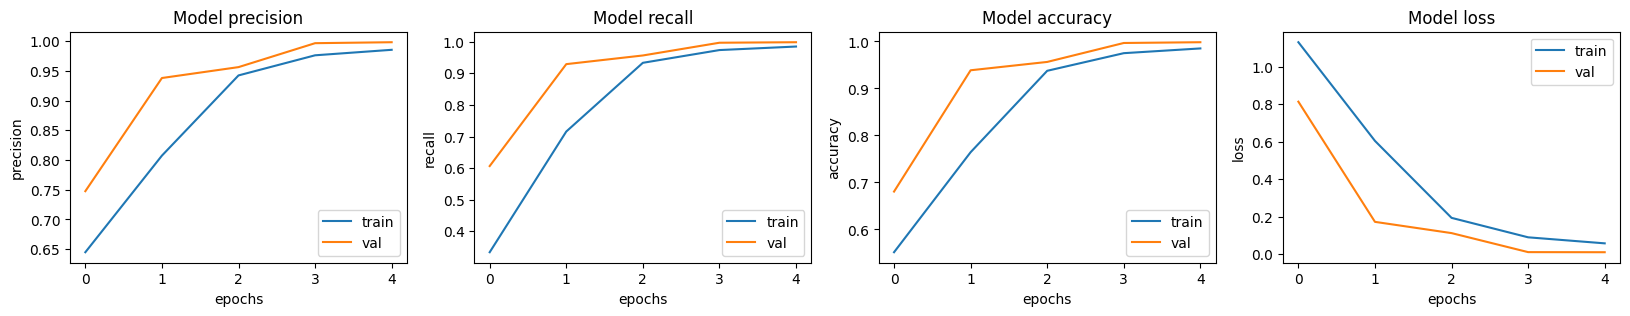

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(Info.history[met])
    ax[i].plot(Info.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:
predictions = model.predict(test_dataset)

7/7 [==============================] - 4s 604ms/step


In [ ]:
diseases_labels = []

for key, value in train_dataset.class_indices.items():
   diseases_labels.append(key)

In [ ]:
def evaluate(actual, predictions):
  pre = []
  for i in predictions:
    pre.append(np.argmax(i))

  accuracy = (pre == actual).sum() / actual.shape[0]
  print(f'Accuracy: {accuracy}')

  precision, recall, f1_score, _ = precision_recall_fscore_support(actual, pre, average='macro')
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1_score: {f1_score}')

  fig, ax = plt.subplots(figsize=(20,20))
  conf_mat = confusion_matrix(actual, pre)
  sns.heatmap(conf_mat, annot=True, fmt='.0f', cmap="YlGnBu", xticklabels=diseases_labels, yticklabels=diseases_labels).set_title('Confusion Matrix Heat map')
  plt.show()

Accuracy: 0.9888178913738019
Precision: 0.9912109375
Recall: 0.9763975155279503
F1_score: 0.9832567763336246


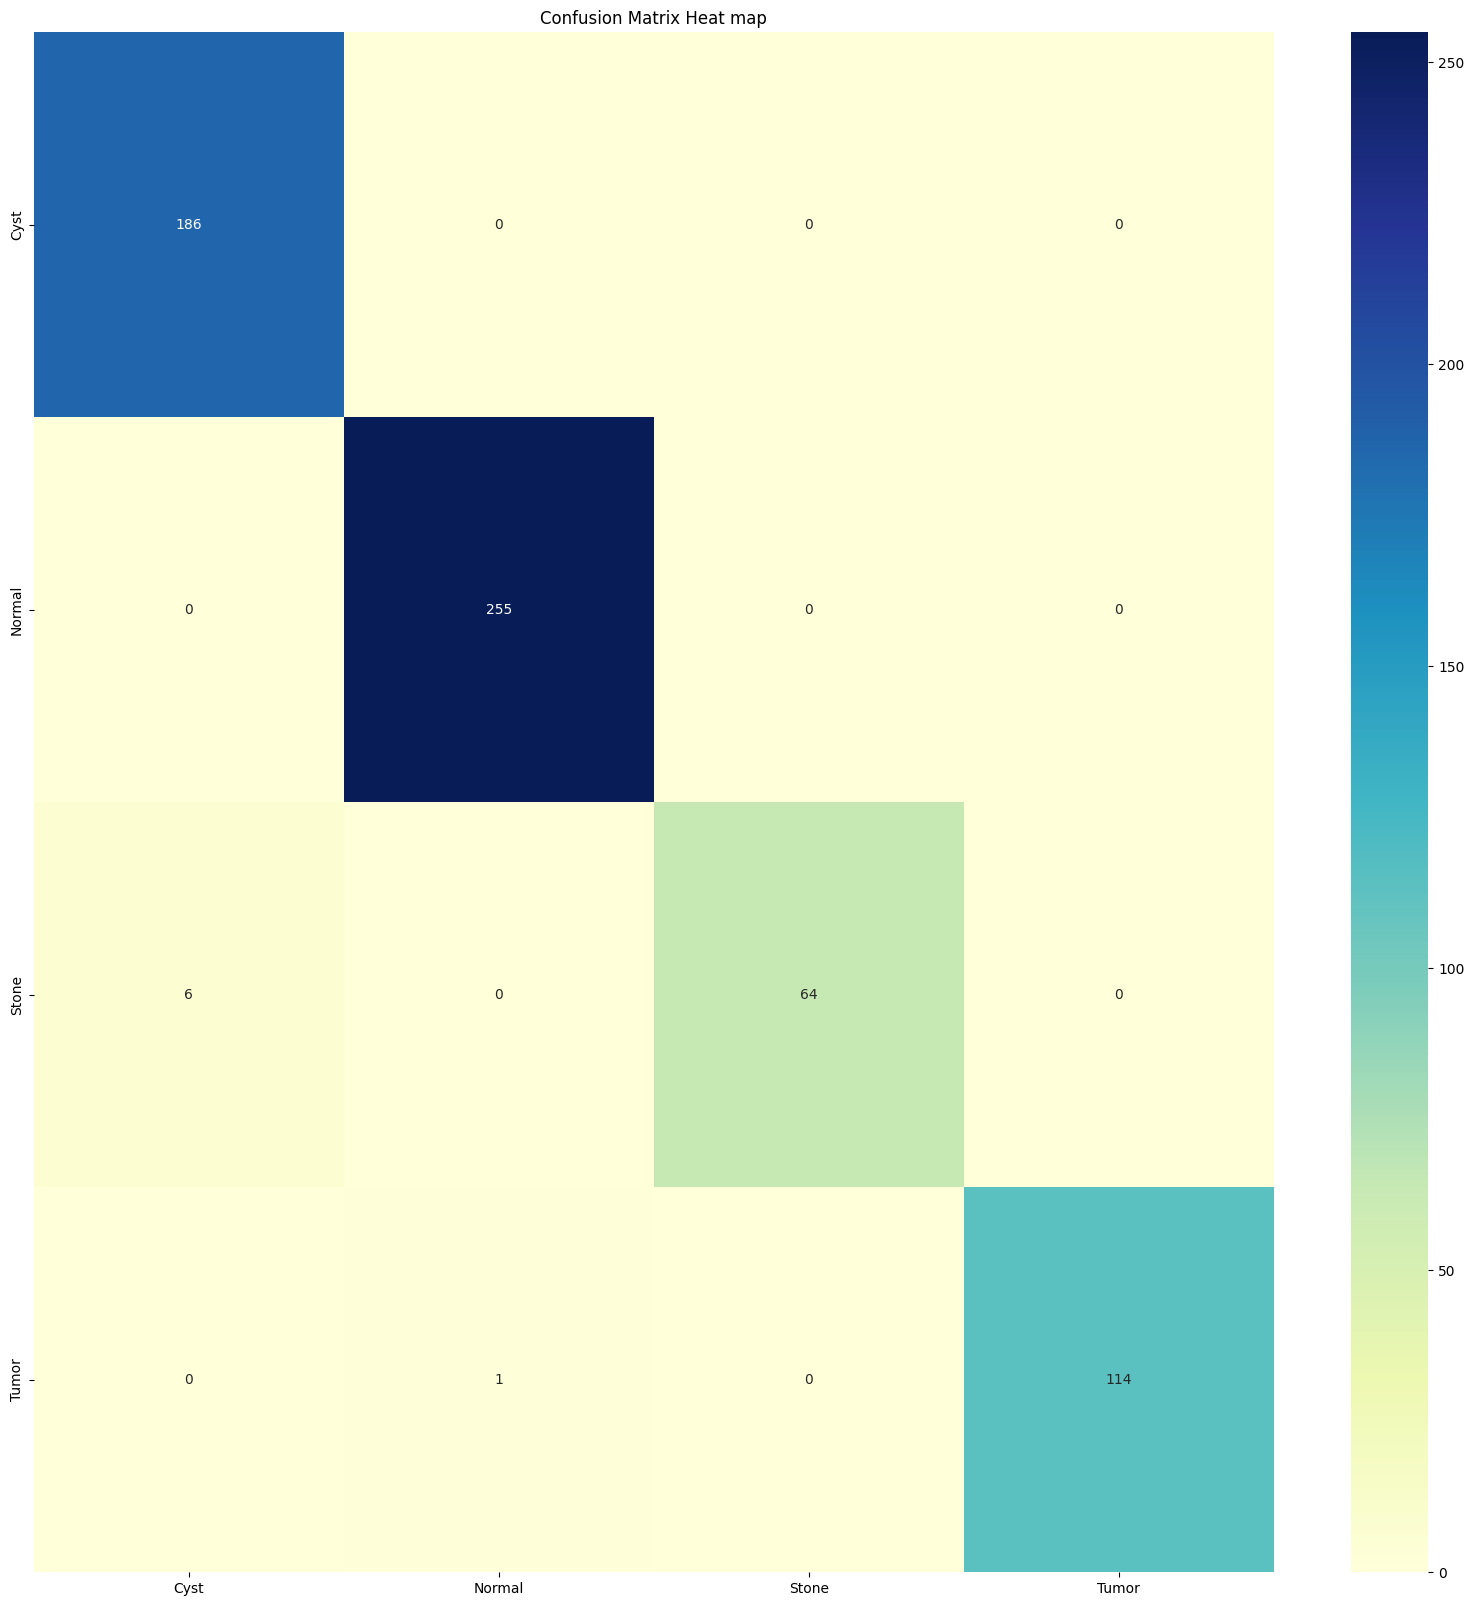

In [ ]:
evaluate(test_dataset.classes,predictions)

In [ ]:
model.evaluate(test_dataset)

7/7 [==============================] - 3s 438ms/step - loss: 0.0392 - accuracy: 0.9888 - precision: 0.9888 - recall: 0.9872


[0.039164312183856964,
 0.9888178706169128,
 0.9887999892234802,
 0.9872204661369324]

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/kidney_best.h5')

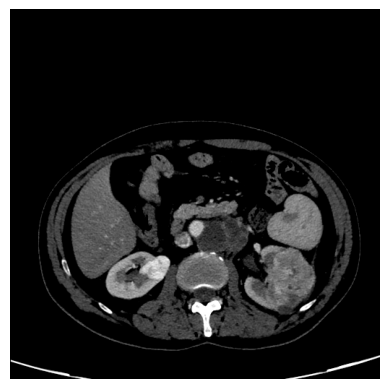

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pls = '/content/drive/MyDrive/oyetundun/test/Tumor/Tumor- (1081).jpg'
img = mpimg.imread(pls)
plt.imshow(img)
plt.axis('off')
plt.show()
# Load and preprocess the new image
img = image.load_img(pls, target_size=(200, 200),color_mode='grayscale')
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Normalize pixel values (if required)

In [ ]:
predictions = model.predict(img)
class_labels = ['Cyst', 'Normal','Stone','Tumor']  # Replace with your class labels
predicted_class = class_labels[np.argmax(predictions)]
confidence = predictions[0][np.argmax(predictions)]  # Probability of the predicted class
print(predicted_class)


1/1 [==============================] - 0s 31ms/step
Tumor
